## **EEG ANALYSIS WITH MNE PYTHON**

### Part 2

Analysis steps are the same of part 1. This code handles several participants, to select one insert the his/her number in `participant = ''`. Code is more compact, list comprehension is used to handle the data.

Python 3.6, MNE 0.14

Lorenzo Alfine, May 2017

`%matplotlib` is used for interactive plots

In [1]:
%matplotlib qt5

#### Importing all the packages

In [2]:
import os
import mne
from matplotlib import pyplot as plt
import numpy as np
from autoreject import LocalAutoRejectCV, plot_epochs
import pandas as pd
import glob
from scipy import signal
import matplotlib.ticker as ticker

C:\Users\alfine-l\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Select the participant to analyse

In [22]:
# Participant to analyze

participant = '10'

#### Setting directories, load montage and data

`data_dir` is the folder that will contain the intermediate results. `input_data_dir` is the folder that contains the raw data of each participant (brainvision format, .eeg - .vhdr - .vmrk ), for example: `L:/PSY-Studenten/Lorenzo/1a_TaPa/EEG/1_Raw/03` contiains raw data of the third participant.

In [5]:
base_dir = os.path.normpath('L:/PSY-Studenten/Lorenzo/Python Scripts/eeg_1a_TaPa_mne')

# folder that contains all the intermediate results and the final ones
data_dir = os.path.join(base_dir, 'Output_data') #outputdata

# folder that contains subfolders: 01, 02, ... where 01 contains the raw data of the first patient, 02 of the second and so on
input_data_dir = os.path.join(os.path.normpath('L:/PSY-Studenten/Lorenzo/1a_TaPa/EEG/1_Raw'),
                              participant)

montage = mne.channels.read_montage(kind='standard-10-5-cap385', path='L:/PSY-Studenten/Lorenzo/22_TaPa2/Montages')

In [6]:
raw_filenames = glob.glob(os.path.join(input_data_dir, '*.vhdr'))
raw_list = list()

# load the raw data and put all the blocks in a list
for a in raw_filenames:
     raw_list.append(mne.io.read_raw_brainvision(a))

Extracting parameters from L:\PSY-Studenten\Lorenzo\1a_TaPa\EEG\1_Raw\10\TaPa_10_01.vhdr...
Setting channel info structure...
Extracting parameters from L:\PSY-Studenten\Lorenzo\1a_TaPa\EEG\1_Raw\10\TaPa_10_02.vhdr...
Setting channel info structure...
Extracting parameters from L:\PSY-Studenten\Lorenzo\1a_TaPa\EEG\1_Raw\10\TaPa_10_03.vhdr...
Setting channel info structure...
Extracting parameters from L:\PSY-Studenten\Lorenzo\1a_TaPa\EEG\1_Raw\10\TaPa_10_04.vhdr...
Setting channel info structure...
Extracting parameters from L:\PSY-Studenten\Lorenzo\1a_TaPa\EEG\1_Raw\10\TaPa_10_05.vhdr...
Setting channel info structure...
Extracting parameters from L:\PSY-Studenten\Lorenzo\1a_TaPa\EEG\1_Raw\10\TaPa_10_06.vhdr...
Setting channel info structure...
Extracting parameters from L:\PSY-Studenten\Lorenzo\1a_TaPa\EEG\1_Raw\10\TaPa_10_07.vhdr...
Setting channel info structure...


### ANALYSIS

In [7]:
# EVENTS and MONTAGE

ids = [140,150,160,170] #onset of the 4 tastants
events_list = list()
sfreq = raw_list[0].info['sfreq']
tshift = 0.036
for e in raw_list:
    events_tmp = mne.find_events(e)
    events_shift_tmp = mne.event.shift_time_events(events_tmp, ids=ids, tshift=tshift, sfreq=sfreq)
    events_list.append(events_shift_tmp)

#montage 
for m in raw_list:
    m.set_montage(montage)

448 events found
Events id: [ 12  14  22  26  27  29  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  52  53  54  56  57  58  60  61  62  63  64  65  66
  67  68  69  70  71 110 111 112 113 114 115 124 125 126 140 150 160 170
 190]
449 events found
Events id: [  9  12  21  22  25  28  29  30  31  32  33  35  38  39  40  41  42  43
  45  46  50  51  52  54  55  57  58  59  61  62  64  65  66  67  68  69
  70  71  72  73  74  75  76  79  84 110 111 112 113 114 115 124 125 126
 140 150 160 170 190]
450 events found
Events id: [ 12  17  22  23  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  45  48  50  51  52  53  54  55  56  57  58  59  62  63  64
  65  66  67  68  69  70  71  72  73  74  76  78  82 110 111 112 113 114
 115 124 125 126 140 150 160 170 190]
450 events found
Events id: [  9  12  15  16  18  20  22  24  26  28  29  30  31  32  34  35  36  37
  38  39  41  42  43  44  45  46  49  55  56  58  59  60  61  62  63  64
  66  68  69  70  7

#### Preprocessing: filtering low-pass and high-pass

In [8]:
# PREPROCESSING

for a in raw_list:
    a.load_data()

# low-pass filter
raw_lp_list = list()
for a in raw_list:
    raw_lp_list.append(a.filter(None, 30, h_trans_bandwidth='auto', filter_length='auto', phase='zero'))

# hp filter
raw_filtered_list = list()
for a in raw_lp_list:
    raw_filtered_list.append(a.filter(.5, None, l_trans_bandwidth='auto', filter_length='auto', phase='zero'))

Reading 0 ... 426770  =      0.000 ...   853.540 secs...
Reading 0 ... 423186  =      0.000 ...   846.372 secs...
Reading 0 ... 417689  =      0.000 ...   835.378 secs...
Reading 0 ... 414771  =      0.000 ...   829.542 secs...
Reading 0 ... 431967  =      0.000 ...   863.934 secs...
Reading 0 ... 415763  =      0.000 ...   831.526 secs...
Reading 0 ... 416998  =      0.000 ...   833.996 secs...
Setting up low-pass filter at 30 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 440 samples (0.880 sec) selected
Setting up low-pass filter at 30 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 440 samples (0.880 sec) selected
Setting up low-pass filter at 30 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 440 samples (0.880 sec) selected
Setting up low-pass filter at 30 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 440 samples (0.880 sec) selected
Setting up low-pass filter at 30 Hz
h_trans_bandwidth chosen to be 7.5 Hz
Filter length of 440 samples (0

In [13]:
# EPOCHING, linear detrending when creating the epochs

epochs_list = list()      
for a in range(len(events_list)):
    epochs_list.append(mne.Epochs(raw_filtered_list[a], events_list[a], event_id=ids, tmin=-0.5, tmax=2,
                     baseline=None,preload=True, add_eeg_ref=False, detrend=1))      
      

epochs_merged = mne.concatenate_epochs(epochs_list)


36 matching events found
0 projection items activated
Loading data for 36 events and 1251 original time points ...
0 bad epochs dropped
36 matching events found
0 projection items activated
Loading data for 36 events and 1251 original time points ...
0 bad epochs dropped
36 matching events found
0 projection items activated
Loading data for 36 events and 1251 original time points ...
0 bad epochs dropped
36 matching events found
0 projection items activated
Loading data for 36 events and 1251 original time points ...
0 bad epochs dropped
36 matching events found
0 projection items activated
Loading data for 36 events and 1251 original time points ...
0 bad epochs dropped
36 matching events found
0 projection items activated
Loading data for 36 events and 1251 original time points ...
0 bad epochs dropped
36 matching events found
0 projection items activated
Loading data for 36 events and 1251 original time points ...
0 bad epochs dropped
252 matching events found
0 bad epochs dropped


In [ ]:
# SAVE EPOCHS DATA
epochs_merged.save(fname=os.path.join(data_dir,
                                      participant + '_epochs_merged-epo.fif'))


In [ ]:
# OPEN SAVED EPOCHS DATA
epochs_merged = mne.read_epochs(fname=os.path.join(data_dir,
                                                   participant + '_epochs_merged-epo.fif'))


### ARTIFACTS REJECTION

#### 1) Autoreject


In [ ]:
# AUTOREJECT

consense = np.arange(.9,.95,.05)
n_interp = [16,32,48]

n = len(epochs_merged.events)
ar = LocalAutoRejectCV(consensus_percs=np.asarray(consense), n_interpolates=np.asarray(n_interp))
epochs_clean = ar.fit_transform(epochs_merged.pick_types(eeg=True, meg=False))

print ('Removed {0} epochs.'.format(n-len(epochs_clean.events)))

In [ ]:
# SAVE EPOCHS AFTER AUTOREJECT

epochs_clean.save(fname=os.path.join(data_dir, participant + '_epochs_clean-epo.fif'))

In [ ]:
# OPEN SAVED EPOCHS DATA AFTER AUTOREJECT

epochs_clean = mne.read_epochs(fname=os.path.join(data_dir, participant + '_epochs_clean-epo.fif'))

#### 2) ICA (Independent component analysis)

In [ ]:
# ICA, independent component analysis

n_components = 64 #if  whitin 0-1, explained by variance, otherwise define number of components
method = 'fastica'
random_state = 5

#ICA ON EPOCHS
# n_components=None -> all PCA components are used
ica = mne.preprocessing.ICA(n_components=None, method=method, random_state=random_state)
ica.fit(epochs_clean)
print(ica)

ica.plot_components(cmap='interactive', inst=epochs_clean)
ica.plot_sources(epochs_clean)


In [ ]:
# visualize the result when zeroing some ICA components. Average plot (evoked object)

ica.plot_overlay(epochs_clean.average())

In [ ]:
# Apply the ICA result on epochs_clean and save the result in epochs_final

ica.apply(epochs_clean)
epochs_final = epochs_clean.copy()

In [ ]:
# SAVE EPOCHS AFTER ICA

ica.save(fname=os.path.join(data_dir, participant + '_ica-ica.fif'))
epochs_final.save(fname=os.path.join(data_dir, participant + '_epochs_final-epo.fif'))

In [9]:
# LOAD EPOCHS DATA AND ICA OBJECT AFTER ICA

ica = mne.preprocessing.read_ica(fname=os.path.join(data_dir, participant + '_ica-ica.fif'))
epochs_final = mne.read_epochs(fname=os.path.join(data_dir, participant + '_epochs_final-epo.fif'))

Reading L:\PSY-Studenten\Lorenzo\Python Scripts\eeg_1a_TaPa_mne\Output_data\10_ica-ica.fif ...
Isotrak not found
Now restoring ICA solution ...
Ready.
Reading L:\PSY-Studenten\Lorenzo\Python Scripts\eeg_1a_TaPa_mne\Output_data\10_epochs_final-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms (None)
        0 CTF compensation matrices available
250 matching events found
250 matching events found
0 projection items activated


Once these steps are done for every participant, **it is possible to combine the results**, calculating the average values across all participants of ERPs, GFPs and topographic maps.



### MERGE RESULTS

When `epochs_final` are calculated for every participant, is possible to merge the results, calculating average Evokeds, GFPs and Topographic Maps.
If you want to calculate Evokeds, GFPs and topomaps just for a single participant, follow the steps in the part1 of the notebook. 

In [10]:
epochs_filenames = glob.glob(os.path.join(data_dir, '*final-epo.fif')) 
epochs_list = list()
for a in range(len(epochs_filenames)):
     epochs_list.append(mne.read_epochs(epochs_filenames[a]))
     epochs_list[a].info['custom_ref_applied'] = False
     epochs_list[a].set_eeg_reference(ref_channels=None)
     epochs_list[a].apply_proj()
     epochs_list[a].apply_baseline(baseline=(-0.2,0))

Reading L:\PSY-Studenten\Lorenzo\Python Scripts\eeg_1a_TaPa_mne\Output_data\01_epochs_final-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms (None)
        0 CTF compensation matrices available
250 matching events found
250 matching events found
0 projection items activated
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but hasn't been applied yet. Use the .apply_proj() method function to apply projections.
Created an SSP operator (subspace dimension = 1)
1 projection items activated
SSP projectors applied...
Applying baseline correction (mode: mean)
Reading L:\PSY-Studenten\Lorenzo\Python Scripts\eeg_1a_TaPa_mne\Output_data\02_epochs_final-epo.fif ...
Isotrak not found
    Found the data of interest:
        t =    -500.00 ...    2000.00 ms (None)
        0 CTF compensation matrices available
222 matching events found
222 matching events found
0 projection items activ

In [11]:
# GET EVOKEDS 

epochs_salty_list = list()
epochs_sweet_list = list()
epochs_sour_list = list()
epochs_bitter_list = list()

evoked_salty_list = list()
evoked_sweet_list = list()
evoked_sour_list = list()
evoked_bitter_list = list()

evoked_salty_datalist = list()

for a in range(len(epochs_list)):
    #epochs subsets
    epochs_salty_list.append(epochs_list[a]['140'])
    epochs_sweet_list.append(epochs_list[a]['150'])
    epochs_sour_list.append(epochs_list[a]['160'])
    epochs_bitter_list.append(epochs_list[a]['170'])
    #evokeds calculated on epochs subsets
    evoked_salty_list.append(epochs_salty_list[a].average())
    evoked_sweet_list.append(epochs_sweet_list[a].average())
    evoked_sour_list.append(epochs_sour_list[a].average())
    evoked_bitter_list.append(epochs_bitter_list[a].average())

In [12]:
# MEAN EVOKED: average each evoked condition acorss all participants, resulting
# in 4 evoked objects

mean_evoked_salty = evoked_salty_list[0].copy()
mean_evoked_sweet = evoked_sweet_list[0].copy()
mean_evoked_sour = evoked_sour_list[0].copy()
mean_evoked_bitter = evoked_bitter_list[0].copy()

mean_evoked_salty.data = np.mean(np.array([e.data for e in evoked_salty_list]), axis=0)                                       
mean_evoked_sweet.data = np.mean(np.array([e.data for e in evoked_sweet_list]), axis=0)                                     
mean_evoked_sour.data = np.mean(np.array([e.data for e in evoked_sour_list]), axis=0)                                     
mean_evoked_bitter.data = np.mean(np.array([e.data for e in evoked_bitter_list]), axis=0)                                   


In [ ]:
# SAVE MEAN EVOKED

mean_evoked_salty.save(fname=os.path.join(data_dir, 'mean_evoked_salty-ave.fif'))
mean_evoked_sweet.save(fname=os.path.join(data_dir, 'mean_evoked_sweet-ave.fif'))
mean_evoked_sour.save(fname=os.path.join(data_dir, 'mean_evoked_sour-ave.fif'))
mean_evoked_bitter.save(fname=os.path.join(data_dir, 'mean_evoked_bitter-ave.fif'))


#### Calculating GFP (Global Field Power)

In [13]:
# MANUALLY CALCULATE GFP AND GRANDMEAN

salty_gfp_grandmean = pd.DataFrame(
   [np.std(evoked.data, ddof=0, axis=0) for evoked in evoked_salty_list]).mean(axis='rows')

sweet_gfp_grandmean = pd.DataFrame(
   [np.std(evoked.data, ddof=0, axis=0) for evoked in evoked_sweet_list]).mean(axis='rows')

sour_gfp_grandmean = pd.DataFrame(
   [np.std(evoked.data, ddof=0, axis=0) for evoked in evoked_sour_list]).mean(axis='rows')

bitter_gfp_grandmean = pd.DataFrame(
   [np.std(evoked.data, ddof=0, axis=0) for evoked in evoked_bitter_list]).mean(axis='rows')

pd.DataFrame([salty_gfp_grandmean, sweet_gfp_grandmean, sour_gfp_grandmean,
              bitter_gfp_grandmean]).T.plot()


In [15]:
# FILTERING SIGNALS (LOW PASS)

b,a = signal.butter(4, 0.20)
time = evoked_bitter_list[0].times*1000

salty_filtered = signal.filtfilt(b,a,salty_gfp_grandmean)
sweet_filtered = signal.filtfilt(b,a,sweet_gfp_grandmean)
sour_filtered = signal.filtfilt(b,a,sour_gfp_grandmean)
bitter_filtered = signal.filtfilt(b,a,bitter_gfp_grandmean)

In [ ]:
# SAVE GFP numpy.ndarray data

np.save(os.path.join(data_dir, 'gfp_salty_1a_TaPa.npy'),salty_filtered)
np.save(os.path.join(data_dir, 'gfp_sweet_1a_TaPa.npy'),sweet_filtered)
np.save(os.path.join(data_dir, 'gfp_sour_1a_TaPa.npy'),sour_filtered)
np.save(os.path.join(data_dir, 'gfp_bitter_1a_TaPa.npy'),bitter_filtered)

In [ ]:
# OPEN SAVED GFPs

salty_filtered = np.load(os.path.join(data_dir, 'gfp_salty_1a_TaPa.npy'))
sweet_filtered = np.load(os.path.join(data_dir, 'gfp_sweet_1a_TaPa.npy'))
sour_filtered = np.load(os.path.join(data_dir, 'gfp_sour_1a_TaPa.npy'))
bitter_filtered = np.load(os.path.join(data_dir, 'gfp_bitter_1a_TaPa.npy'))

### PLOTS

#### GFPs of the four tastants averaged across the participants

In [21]:
# PLOT GFP, 1 per tastant
#plt.close('all')

fig = plt.figure()                                                               
ax = fig.add_subplot(1,1,1)  
plt.plot(time, salty_filtered, label='salty filtered', lw=2)
plt.plot(time, sweet_filtered, label= 'sweet filtered', lw=2)
plt.plot(time, sour_filtered, label= 'sour filtered', lw=2)
plt.plot(time, bitter_filtered, label= 'bitter filtered', lw=2)
minor_ticks = np.arange(-250,2000, 250)
#major_ticks = np.arange(-500,2000, 500)
ax.set_xticks(minor_ticks, minor=True)
#ax.set_xticks(major_ticks)
ax.grid(which='both')
scale = 1e6
ticks = ticker.FuncFormatter(lambda y, pos: '{0:g}'.format(y*scale))
ax.yaxis.set_major_formatter(ticks)
#ax.grid(which='minor', alpha=0.2)                                                
#ax.grid(which='major', alpha=0.5)
plt.xlabel('time [ms]')
plt.ylabel(r'amplitude [ $\mu$ V]')
plt.legend()
plt.xlim(-200,2000)
plt.title('GFP healthy subjects')
plt.show()

#### Topographic maps, one per tastant, averaged across the participants

In [17]:
interval = np.arange(0.1, 0.9, 0.05)

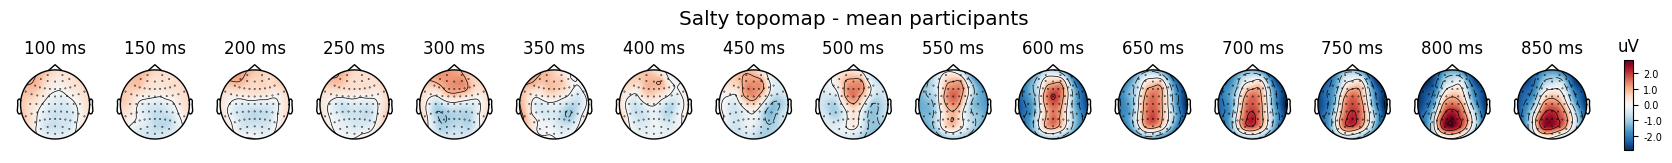

In [19]:
mean_evoked_salty.plot_topomap(times=interval, title='Salty topomap - mean participants', average=0.025)
mean_evoked_sweet.plot_topomap(times=interval, title='Salty topomap - mean participants', average=0.025)
mean_evoked_sour.plot_topomap(times=interval, title='Salty topomap - mean participants', average=0.025)
mean_evoked_bitter.plot_topomap(times=interval, title='Salty topomap - mean participants', average=0.025)